In [409]:
import pandas as pd
import requests
import json
from api_key import geoapify_key
import hvplot.pandas
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np

In [410]:
csv_path = "Median_Salary_County.csv"
csv_path1 = "Median House Price by County.csv"
csv_path2 = r"C:\Users\bmrop\OneDrive\Desktop\project1\county_lat_long.csv"
csv_path3 = r"C:\Users\bmrop\OneDrive\Desktop\project1\lifeandsalestax.csv"

In [411]:
salary_median_df = pd.read_csv(csv_path)
salary_median_df = salary_median_df[["Area_name", "State", "Median_Household_Income_2020"]]
salary_median_df = salary_median_df.dropna(how="any")
salary_median_df['Area_name'] = salary_median_df['Area_name'].str.split(',').str[0]
salary_median_df

,Area_name,State,Median_Household_Income_2020
0,United States,US,"67,340"
1,Alabama,AL,"53,958"
2,Autauga County,AL,"67,565"
3,Baldwin County,AL,"71,135"
4,Barbour County,AL,"38,866"
...,...,...,...
3193,Sweetwater County,WY,"70,583"
3194,Teton County,WY,"92,488"
3195,Uinta County,WY,"71,246"
3196,Washakie County,WY,"58,532"


In [412]:
salary_median_df['Median_Household_Income_2020'] = salary_median_df['Median_Household_Income_2020'].str.split(',').str[0] + salary_median_df['Median_Household_Income_2020'].str.split(',').str[1]
salary_median_df = salary_median_df.rename(columns={"Area_name": "RegionName"})
salary_median_df

,RegionName,State,Median_Household_Income_2020
0,United States,US,67340
1,Alabama,AL,53958
2,Autauga County,AL,67565
3,Baldwin County,AL,71135
4,Barbour County,AL,38866
...,...,...,...
3193,Sweetwater County,WY,70583
3194,Teton County,WY,92488
3195,Uinta County,WY,71246
3196,Washakie County,WY,58532


In [413]:
house_median_df = pd.read_csv(csv_path1)
house_median_df = house_median_df[["RegionName", "StateName", "1/31/2020"]]
house_median_df = house_median_df.dropna(how="any")
house_median_df = house_median_df.rename(columns={"StateName":"State"})
house_median_df

,RegionName,State,1/31/2020
0,Los Angeles County,CA,631286.38240
1,Cook County,IL,216299.06610
2,Harris County,TX,202261.48560
3,Maricopa County,AZ,302470.39690
4,San Diego County,CA,602616.84940
...,...,...,...
3067,Grant County,NE,118399.36330
3068,Hooker County,NE,64905.40872
3069,Treasure County,MT,134998.62360
3073,San Juan County,CO,283625.08840


In [414]:
merge_df = pd.merge(salary_median_df, house_median_df, on=["RegionName", "State"])
merge_df

,RegionName,State,Median_Household_Income_2020,1/31/2020
0,Autauga County,AL,67565,167794.70320
1,Baldwin County,AL,71135,235495.20100
2,Barbour County,AL,38866,92471.01406
3,Bibb County,AL,50907,118755.31520
4,Blount County,AL,55203,143990.20400
...,...,...,...,...
2916,Sweetwater County,WY,70583,216300.73140
2917,Teton County,WY,92488,916383.28190
2918,Uinta County,WY,71246,193432.08850
2919,Washakie County,WY,58532,174108.69650


In [415]:
#merge_df.info()
merge_df["Ratio_Income_to_House"] = merge_df["Median_Household_Income_2020"].astype(float) /  merge_df["1/31/2020"]
merge_df = merge_df.sort_values("Ratio_Income_to_House", ascending=False)
merge_df["Rank"] = range(1, len(merge_df)+1)
merge_df

,RegionName,State,Median_Household_Income_2020,1/31/2020,Ratio_Income_to_House,Rank
880,Hodgeman County,KS,60414,2.675785e+04,2.257805,1
851,Clark County,KS,58365,2.629169e+04,2.219903,2
938,Wallace County,KS,57386,2.665645e+04,2.152800,3
931,Stafford County,KS,55004,2.605261e+04,2.111267,4
915,Rawlins County,KS,54417,2.902374e+04,1.874913,5
...,...,...,...,...,...,...
197,San Mateo County,CA,132369,1.283052e+06,0.103167,2917
2917,Teton County,WY,92488,9.163833e+05,0.100927,2918
1154,Dukes County,MA,80459,8.404458e+05,0.095734,2919
261,Pitkin County,CO,93634,1.052431e+06,0.088969,2920


In [416]:
county_latlon_df = pd.read_csv(csv_path2)
county_latlon_df = county_latlon_df[["county", "state_id", "lat", "lng"]]
county_latlon_df = county_latlon_df.rename(columns={"county":"RegionName", "state_id":"State"})
county_latlon_df

,RegionName,State,lat,lng
0,Los Angeles,CA,34.3209,-118.2247
1,Cook,IL,41.8401,-87.8168
2,Harris,TX,29.8577,-95.3936
3,Maricopa,AZ,33.3490,-112.4915
4,San Diego,CA,33.0343,-116.7350
...,...,...,...,...
3138,Blaine,NE,41.9128,-99.9767
3139,King,TX,33.6165,-100.2558
3140,Kenedy,TX,26.9285,-97.7017
3141,Loving,TX,31.8493,-103.5800


In [417]:
merge_df['RegionName'] = merge_df['RegionName'].str.split(' ').str[0]
merge_df

,RegionName,State,Median_Household_Income_2020,1/31/2020,Ratio_Income_to_House,Rank
880,Hodgeman,KS,60414,2.675785e+04,2.257805,1
851,Clark,KS,58365,2.629169e+04,2.219903,2
938,Wallace,KS,57386,2.665645e+04,2.152800,3
931,Stafford,KS,55004,2.605261e+04,2.111267,4
915,Rawlins,KS,54417,2.902374e+04,1.874913,5
...,...,...,...,...,...,...
197,San,CA,132369,1.283052e+06,0.103167,2917
2917,Teton,WY,92488,9.163833e+05,0.100927,2918
1154,Dukes,MA,80459,8.404458e+05,0.095734,2919
261,Pitkin,CO,93634,1.052431e+06,0.088969,2920


In [418]:
merge_df1 = pd.merge(merge_df, county_latlon_df, on=["RegionName", "State"])
merge_df1

,RegionName,State,Median_Household_Income_2020,1/31/2020,Ratio_Income_to_House,Rank,lat,lng
0,Hodgeman,KS,60414,2.675785e+04,2.257805,1,38.0875,-99.8979
1,Clark,KS,58365,2.629169e+04,2.219903,2,37.2355,-99.8203
2,Wallace,KS,57386,2.665645e+04,2.152800,3,38.9167,-101.7636
3,Stafford,KS,55004,2.605261e+04,2.111267,4,38.0310,-98.7174
4,Rawlins,KS,54417,2.902374e+04,1.874913,5,39.7852,-101.0765
...,...,...,...,...,...,...,...,...
2775,Marin,CA,127601,1.057767e+06,0.120632,2912,38.0735,-122.7235
2776,Kings,NY,70390,6.041758e+05,0.116506,2915,40.6395,-73.9385
2777,Teton,WY,92488,9.163833e+05,0.100927,2918,43.9346,-110.5898
2778,Dukes,MA,80459,8.404458e+05,0.095734,2919,41.3961,-70.6501


In [419]:
# params = {"apiKey": geoapify_key, "categories":"entertainment"}
# #for row in merge_df1.head(50).itertuples():
# latitude = 38.0875
# longitude = -99.8979
# radius = 2000
# params["filter"] = f"circle:{longitude},{latitude},{radius}"
# params["bias"] = f"proximity:{longitude},{latitude}"
# base_url = "https://api.geoapify.com/v2/places?PARAMS"
# response = requests.get(base_url, params=params)
# response = response.json()
# #print(json.dumps(response, indent=4, sort_keys=True))
# x = 0
# for feature in response["features"]:
#     print(response["features"][x]["properties"]["address_line1"])
#     x = x+1

In [420]:
merge_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2780 entries, 0 to 2779
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionName                    2780 non-null   object 
 1   State                         2780 non-null   object 
 2   Median_Household_Income_2020  2780 non-null   object 
 3   1/31/2020                     2780 non-null   float64
 4   Ratio_Income_to_House         2780 non-null   float64
 5   Rank                          2780 non-null   int64  
 6   lat                           2780 non-null   float64
 7   lng                           2780 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 195.5+ KB


In [421]:
params = {"apiKey": geoapify_key, "categories":"entertainment"}
for index, row in merge_df1.head(50).iterrows():
    latitude = row["lat"]
    longitude = row["lng"]
    radius = 20000
    params["filter"] = f"circle:{longitude},{latitude},{radius}"
    params["bias"] = f"proximity:{longitude},{latitude}"
    base_url = "https://api.geoapify.com/v2/places?PARAMS"
    response = requests.get(base_url, params=params)
    response = response.json()
    x = 0
    try:
        for feature in response["features"]:
            print(response["features"][x]["properties"]["address_line1"])
            x = x+1
            merge_df1.loc[index, "Entertainments"] = x   
            
            
    except:
        print("none")
        


Haun Museum
Pioneer-Krier
Strand Theatre
Fort Wallace Museum
Stafford County Museum
South Main Street
Jayhawk Theatre
Palace Theatre
Riverside Drive
Marquee Cinemas McDowell 3
McDowell Street
Northrup Theatre
Hamilton County Museum
Lincoln County Historical Society
Harlow Studio & Gallery
Finch Theater
Crispin’s Drug Store Museum
Post Rock Scout Museum
Lincoln Public Pool
High Banks Racing Museum
Boyer Museum of Animated Carvings
Blair Theater
Amphitheatre
Train caboose
Republic County Historical Society
Barbed Wire Museum
Chief Theater
Comanche County Museum
Dream Theater
Fossil Station Museum
East Edward Avenue
Russell Museum Oilpatch
Ute Theater
Star Theater of Tribune
North 2nd Street
LaHarpe City Park Zipline
B & B Iola Sterling Six Cinemas
Bowlus Fine Arts Center
Allen County Historical Society
Country Lanes
South Court Street
Stanton County Museum
Buffalo Museum
Buffalo Theatre
Galesburg Museum
B & B Chanute Roxy Cinema 4
South Main Street
Iron Horse Museum
Parsons Historical Mu

In [422]:
merge_df2 = merge_df1.head(50)
merge_df2

,RegionName,State,Median_Household_Income_2020,1/31/2020,Ratio_Income_to_House,Rank,lat,lng,Entertainments
0,Hodgeman,KS,60414,26757.84736,2.257805,1,38.0875,-99.8979,1.0
1,Clark,KS,58365,26291.68662,2.219903,2,37.2355,-99.8203,1.0
2,Wallace,KS,57386,26656.45185,2.152800,3,38.9167,-101.7636,2.0
3,Stafford,KS,55004,26052.60787,2.111267,4,38.0310,-98.7174,2.0
4,Rawlins,KS,54417,29023.74176,1.874913,5,39.7852,-101.0765,1.0
5,Edwards,KS,51756,28235.50759,1.833011,6,37.8876,-99.3121,1.0
6,McDowell,WV,26582,14611.87731,1.819205,7,37.3785,-81.6536,3.0
7,Hamilton,KS,61342,33909.74773,1.808978,8,37.9991,-101.7912,2.0
8,Trego,KS,60246,34257.26519,1.758634,9,38.9143,-99.8728,NaN
9,Lincoln,KS,50231,29609.92376,1.696424,10,39.0453,-98.2077,6.0


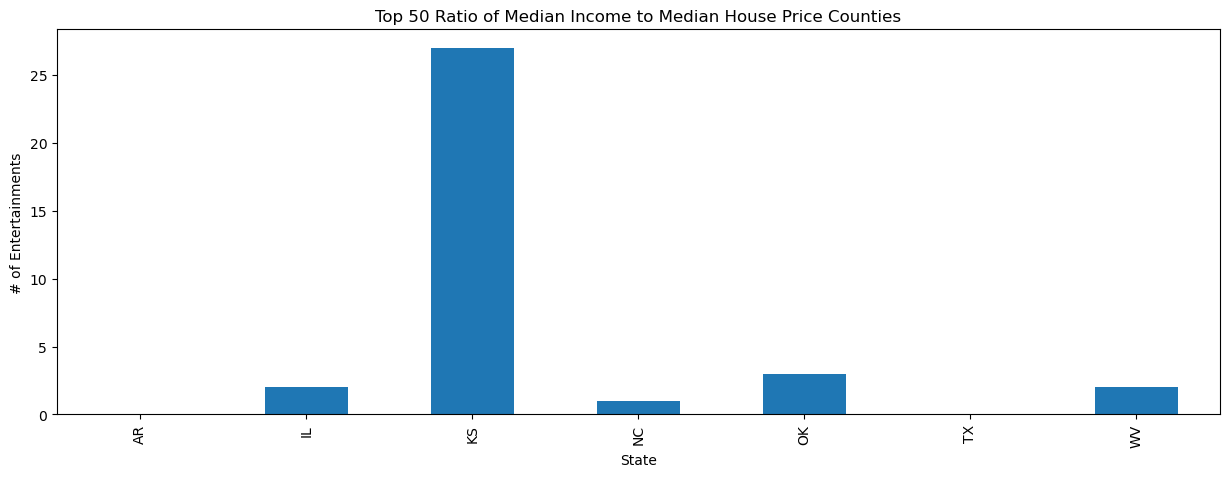

In [423]:
topcounty_entertainmentsbystate = merge_df2.groupby("State")
entertainment_count = topcounty_entertainmentsbystate["Entertainments"].count()
count_chart = entertainment_count.plot(kind="bar", figsize=(15,5))
count_chart.set_xlabel("State")
count_chart.set_ylabel("# of Entertainments")
count_chart.set_title("Top 50 Ratio of Median Income to Median House Price Counties")
plt.show()


In [424]:
narrow_mergedf1 = merge_df1.loc[(merge_df1["Rank"]<=100)]
map_plot = narrow_mergedf1.hvplot.points("lng","lat", geo=True, tiles="OSM",frame_width = 800, frame_height = 600, size = "Rank")
map_plot


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (Rank)

Ho: If a county has a higher ratio of Median Income to Median House Price, then the population doesn't have a higher life expectancy/ Beta(mean) = 0
Ha: If a county has a higher ratio of Median Income to Median House Price, then the population has a higher life expectancy/ Beta(mean) not equal to 0


In [425]:
merge_df1["Location"] = merge_df1["RegionName"] + "County" + " " + merge_df1["State"]
life_sales_df["Location"] = life_sales_df["RegionName"] + "County" + life_sales_df["State"]
merge_df3 = pd.merge(merge_df1, life_sales_df, on=["Location"])
merge_df3



,RegionName_x,State_x,Median_Household_Income_2020,1/31/2020,Ratio_Income_to_House,Rank,lat,lng,Entertainments,Location,RegionName_y,State_y,Life Expectancy
0,Hodgeman,KS,60414,2.675785e+04,2.257805,1,38.0875,-99.8979,1.0,HodgemanCounty KS,Hodgeman,KS,81.800000
1,Clark,KS,58365,2.629169e+04,2.219903,2,37.2355,-99.8203,1.0,ClarkCounty KS,Clark,KS,86.600000
2,Wallace,KS,57386,2.665645e+04,2.152800,3,38.9167,-101.7636,2.0,WallaceCounty KS,Wallace,KS,81.600000
3,Stafford,KS,55004,2.605261e+04,2.111267,4,38.0310,-98.7174,2.0,StaffordCounty KS,Stafford,KS,76.400000
4,Rawlins,KS,54417,2.902374e+04,1.874913,5,39.7852,-101.0765,1.0,RawlinsCounty KS,Rawlins,KS,80.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,Marin,CA,127601,1.057767e+06,0.120632,2912,38.0735,-122.7235,NaN,MarinCounty CA,Marin,CA,83.388235
2785,Kings,NY,70390,6.041758e+05,0.116506,2915,40.6395,-73.9385,NaN,KingsCounty NY,Kings,NY,80.061236
2786,Teton,WY,92488,9.163833e+05,0.100927,2918,43.9346,-110.5898,NaN,TetonCounty WY,Teton,WY,81.950000
2787,Dukes,MA,80459,8.404458e+05,0.095734,2919,41.3961,-70.6501,NaN,DukesCounty MA,Dukes,MA,81.275000


In [431]:
# income_house = merge_df3["Ratio_Income_to_House"].mean()
# life_exp = merge_df3["Life Expectancy"].mean()
# life_exp = merge_df3[merge_df3["Life Expectancy"]]
stats.ttest_ind(merge_df3.dropna()["Ratio_Income_to_House"], merge_df3.dropna()["Life Expectancy"], equal_var=False)

Ttest_indResult(statistic=-142.48932364759173, pvalue=1.3977540553643931e-49)

Reject Ho, the difference of the means are not equal to zero and there is statistical significance between Life Expectancy and Ratio of Median Income to Median House Price

In [434]:
def lin_regression(x,y,title):
    plt.scatter(x,y)
    plt.xlabel("Ratio_Income_to_House")
    plt.ylabel(title)
    (slope,intercept,rvalue,pvalue,stderr) = stats.linregress(x,y)
    regress_values = x*slope + intercept
    line_eq =  "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.plot(x,regress_values,"r")
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

The r-value is: 0.15089826968344158


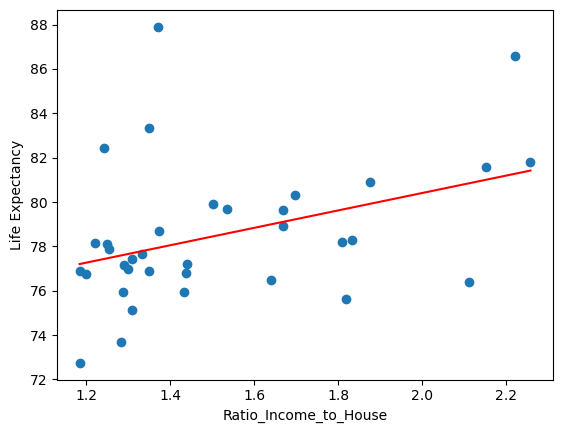

In [436]:
lin_regression(merge_df3.dropna()['Ratio_Income_to_House'],merge_df3.dropna()['Life Expectancy'], "Life Expectancy")